# Bharat Intern :- Data Science
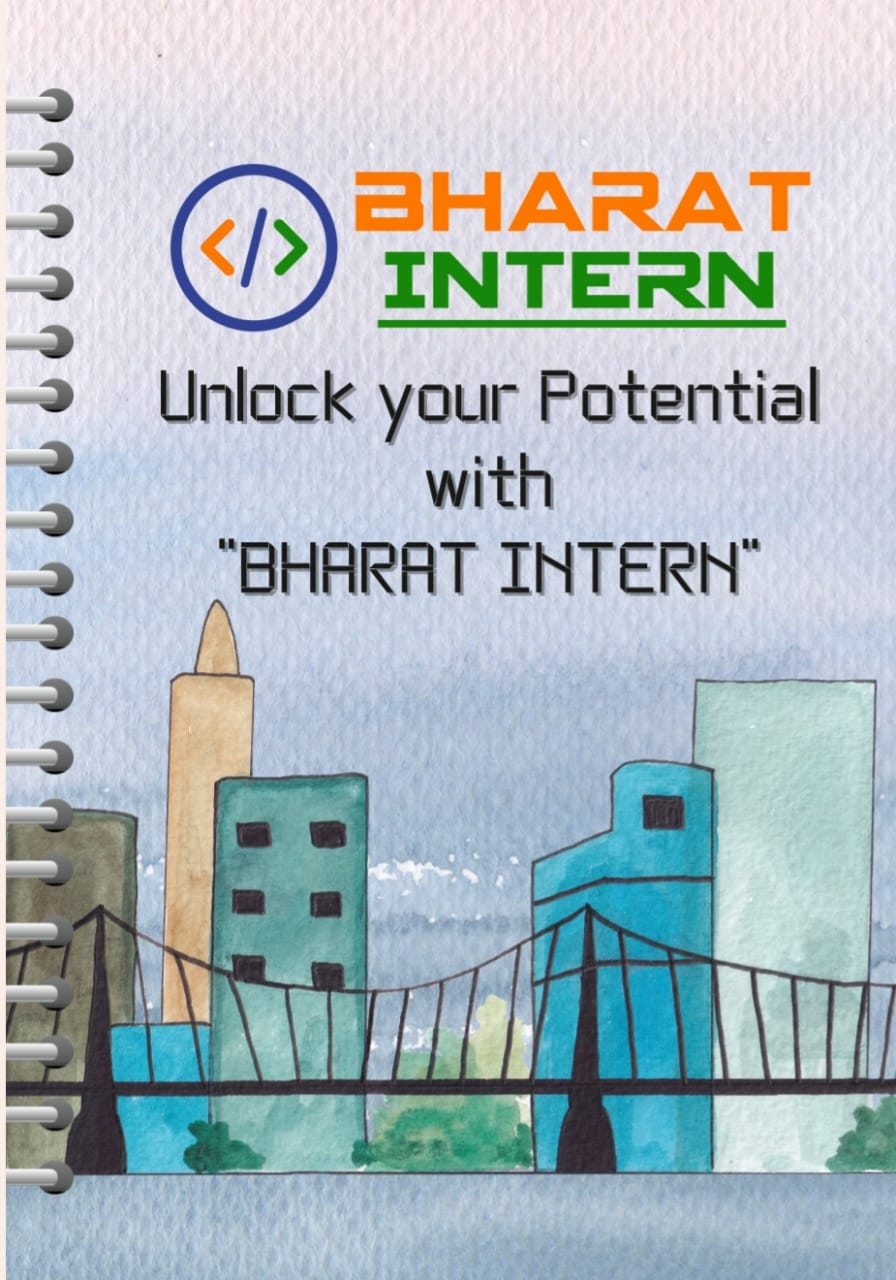

# ABOUT 
At Bharat Intern, we firmly believe that beginning with strength is the ultimate secret to success. Therefore, we are committed to equipping college students with the essential skills, experience, and knowledge required to kick-start their careers and reach their aspirations. Our internship programs are expertly crafted to assist students in not just starting strong, but finishing even stronger, enabling them to distinguish themselves in the cut-throat job market and accomplish their ambitions.

# -> TASK 1 - Number Recognition
###  Handwirtten  digit recognition system not only detects scanned images of handwritten digit recognition using MNIST dataset is a major project mode with the help of Neural Network. It basically detects the scanned image of handwritten digit.

In [27]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import mnist
import keras

In [28]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [29]:
from tensorflow.keras.utils import to_categorical
batch_size = 128
num_classes = 10
epochs = 25
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [30]:
# Normalize to 0 to 1 range
X_train /= 255
X_test /= 255

In [31]:
print('Number of images in training Set: ', X_train.shape[0], )
print('Number of images in training Set: ', X_test.shape[0], )
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

Number of images in training Set:  60000
Number of images in training Set:  10000


In [32]:
print('Training set size:', X_train.shape)
print('Testing set size:', X_test.shape)
print('Training label size;',y_train.shape)
print('testing  label size;',y_test.shape)

Training set size: (60000, 784)
Testing set size: (10000, 784)
Training label size; (60000, 10)
testing  label size; (10000, 10)


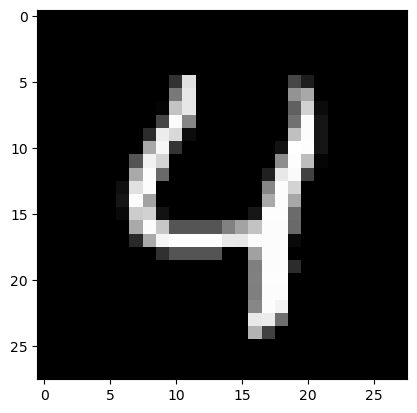

In [33]:

plt.imshow(X_test[4:5].reshape(28,28), cmap='gray')
plt.show()

In [34]:
print("Label:",y_test[4:5])

Label: [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


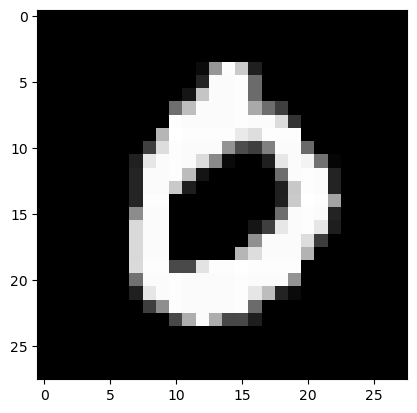

In [35]:
plt.imshow(X_test[3:4].reshape(28,28), cmap='gray')
plt.show()

In [36]:
print("Label:",y_test[3:4])

Label: [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [37]:
# NN Model structure
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop

In [38]:
first_layer_size = 32

In [39]:
model = Sequential()

In [40]:
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                25120     
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 27562 (107.66 KB)
Trainable params: 27562 (107.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
#Model compilation
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=["accuracy"])

In [43]:
# Write the Training input and output variables, size of the batch, number of epochs
history = model.fit(X_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2)

Epoch 1/25
469/469 - 4s - loss: 1.6900 - accuracy: 0.4599 - 4s/epoch - 8ms/step
Epoch 2/25
469/469 - 3s - loss: 0.7718 - accuracy: 0.7939 - 3s/epoch - 5ms/step
Epoch 3/25
469/469 - 2s - loss: 0.4289 - accuracy: 0.8881 - 2s/epoch - 5ms/step
Epoch 4/25
469/469 - 2s - loss: 0.3140 - accuracy: 0.9163 - 2s/epoch - 5ms/step
Epoch 5/25
469/469 - 2s - loss: 0.2565 - accuracy: 0.9313 - 2s/epoch - 5ms/step
Epoch 6/25
469/469 - 3s - loss: 0.2200 - accuracy: 0.9401 - 3s/epoch - 6ms/step
Epoch 7/25
469/469 - 2s - loss: 0.1946 - accuracy: 0.9469 - 2s/epoch - 5ms/step
Epoch 8/25
469/469 - 3s - loss: 0.1750 - accuracy: 0.9521 - 3s/epoch - 6ms/step
Epoch 9/25
469/469 - 3s - loss: 0.1598 - accuracy: 0.9558 - 3s/epoch - 7ms/step
Epoch 10/25
469/469 - 3s - loss: 0.1478 - accuracy: 0.9588 - 3s/epoch - 6ms/step
Epoch 11/25
469/469 - 3s - loss: 0.1377 - accuracy: 0.9614 - 3s/epoch - 6ms/step
Epoch 12/25
469/469 - 2s - loss: 0.1290 - accuracy: 0.9636 - 2s/epoch - 5ms/step
Epoch 13/25
469/469 - 2s - loss: 0.12

In [44]:
# save model and architecture to single file
model.save('MNIST-ANN.h5')
model.summary()

print("Saved model to disk")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                25120     
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 27562 (107.66 KB)
Trainable params: 27562 (107.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Saved model to disk


In [45]:
# Loading saved model from Drive.
from keras.models import load_model
model = load_model('MNIST-ANN.h5')
print("Model is Loaded")
model.summary()

Model is Loaded
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                25120     
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 27562 (107.66 KB)
Trainable params: 27562 (107.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


dict_keys(['loss', 'accuracy'])


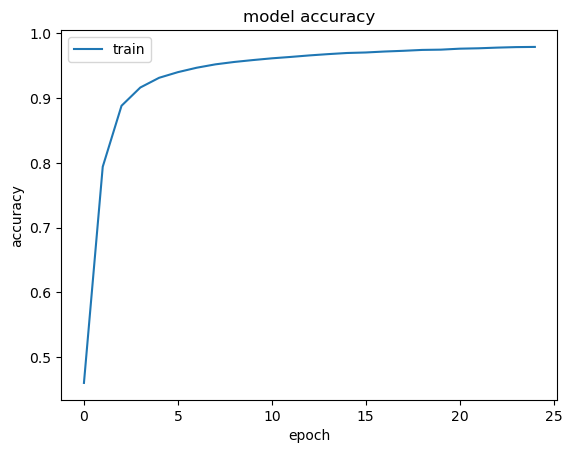

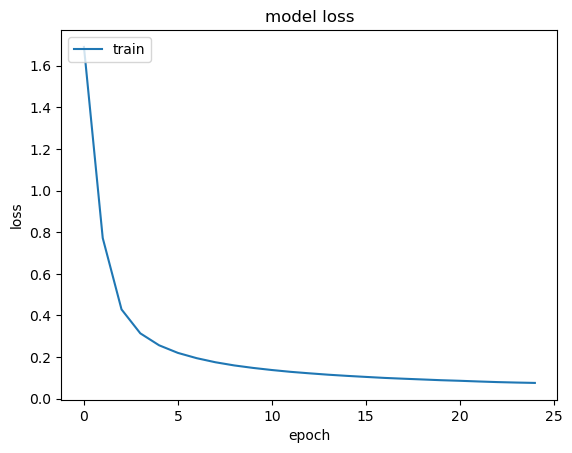

In [46]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [47]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
313/313 [==============================] - 2s 4ms/step - loss: 0.1343 - accuracy: 0.9645
Test Accuracy: 96.45000100135803


In [48]:
#Trainig accuracy
y_pred=model.predict(X_train)

y_pred=np.argmax(y_pred,axis=1)
print(y_pred)
print(y_pred.shape)

1875/1875 [==============================] - 9s 5ms/step
[5 0 4 ... 5 6 8]
(60000,)


In [49]:

# Original Training  label
y_train_original=np.argmax(y_train,axis=1)
print(y_train_original)

[5 0 4 ... 5 6 8]


In [50]:
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_train_original, y_pred))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_train_original, y_pred))

Classification report 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5923
           1       0.99      0.99      0.99      6742
           2       0.98      0.98      0.98      5958
           3       0.97      0.98      0.98      6131
           4       0.99      0.97      0.98      5842
           5       0.98      0.98      0.98      5421
           6       0.99      0.99      0.99      5918
           7       0.98      0.99      0.98      6265
           8       0.97      0.98      0.98      5851
           9       0.97      0.97      0.97      5949

    accuracy                           0.98     60000
   macro avg       0.98      0.98      0.98     60000
weighted avg       0.98      0.98      0.98     60000

Confusion matrix 
[[5855    0    7    3    0   22    9    0   25    2]
 [   1 6686   10    6    1    1    3   14   17    3]
 [   5   12 5825   43   13    0    4   31   20    5]
 [   0    3   24 6015    0   26    0   18

In [51]:
# testing accuracy
y_pred=model.predict(X_test)

y_pred=np.argmax(y_pred,axis=1)
print(y_pred)
print(y_pred.shape)

313/313 [==============================] - 2s 5ms/step
[7 2 1 ... 4 5 6]
(10000,)


In [52]:
# Original testing Label
y_test_original=np.argmax(y_test,axis=1)
y_test_original

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [53]:
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_test_original, y_pred))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_test_original, y_pred))

Classification report 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.96      0.97      1032
           3       0.93      0.98      0.95      1010
           4       0.97      0.95      0.96       982
           5       0.95      0.94      0.95       892
           6       0.97      0.97      0.97       958
           7       0.96      0.97      0.96      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

Confusion matrix 
[[ 963    0    0    2    0    9    4    1    1    0]
 [   0 1121    1    2    0    3    3    0    5    0]
 [   5    1  990   14    3    1    0   11    6    1]
 [   0    0    7  985    0    5    0    8

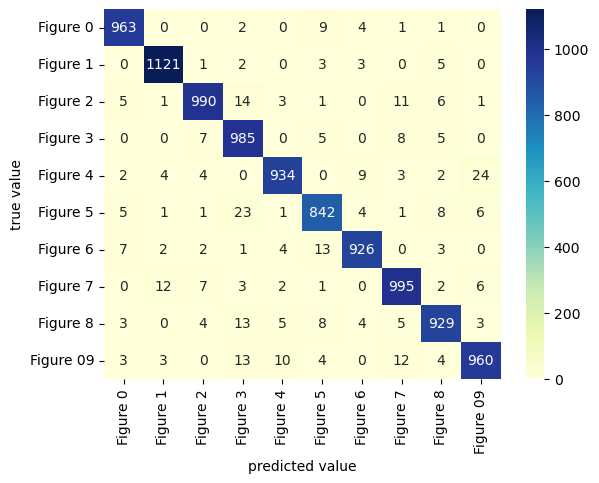

In [54]:
#Prediction of test set
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test_original,y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g', xticklabels=['Figure 0','Figure 1','Figure 2','Figure 3','Figure 4','Figure 5','Figure 6','Figure 7','Figure 8','Figure 09'], 
            yticklabels=['Figure 0','Figure 1','Figure 2','Figure 3','Figure 4','Figure 5','Figure 6','Figure 7','Figure 8','Figure 09']); 

plt.xlabel('predicted value')
plt.ylabel('true value');

In [55]:
# Write the testing input and output variables
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.13432474434375763
Test accuracy: 0.9645000100135803


Label: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


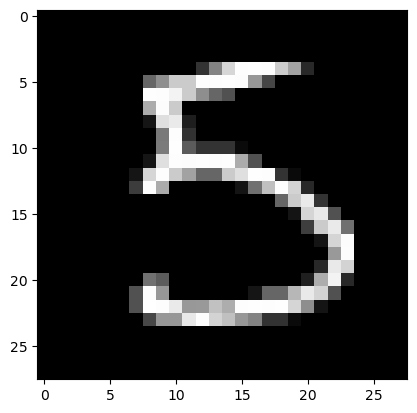

In [56]:
print("Label:",y_test[15:16])
plt.imshow(X_test[15:16].reshape(28,28), cmap='gray')
plt.show()

In [57]:
# Write the index of the test sample to test
prediction = model.predict(X_test[15:16])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

1/1 [==============================] - 0s 414ms/step
Prediction
 [1.1262475e-05 1.5902119e-04 1.4259597e-06 1.4382612e-02 1.7121375e-08
 9.8447406e-01 2.0181618e-05 4.3148694e-07 9.1212825e-04 3.8820628e-05]

Thresholded output
 [0 0 0 0 0 1 0 0 0 0]


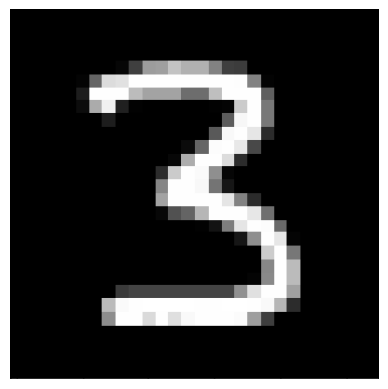

In [62]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image in color
image_bgr = cv2.imread('TESTING.png', cv2.IMREAD_COLOR)
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

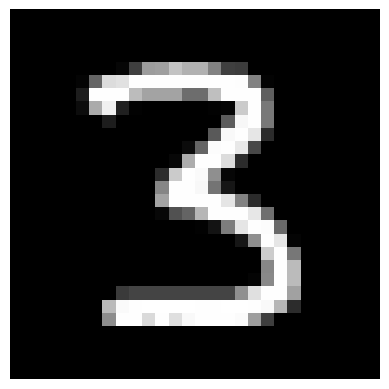

In [63]:
# Load image as grayscale

# Write the path to the image

image = cv2.imread('TESTING.png', cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (28, 28)) 
# Show image
plt.imshow(image_resized, cmap='gray'), plt.axis("off")
plt.show()

In [64]:
prediction = model.predict(image_resized.reshape(1,784))
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:',np.where(thresholded == 1)[1][0])

1/1 [==============================] - 0s 451ms/step
Prediction Score:
 [3.01990610e-08 1.44961859e-05 4.49539039e-05 9.99785841e-01
 3.97941985e-10 1.40887478e-05 1.71608713e-10 1.59144947e-05
 1.20887926e-04 3.75734476e-06]

Thresholded Score:
 [0 0 0 1 0 0 0 0 0 0]

Predicted Digit: 3


In [ ]:
#